# Step 0: Importing and Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dots = sns.load_dataset("dots")

# Step 1: Data Understanding

- dataframe shape
- head and tail
- dtypes
- columns
- describe

In [3]:
# Dataframe shape

dots.shape

(848, 5)

In [4]:
# Head and Tail

dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [5]:
dots.tail()

# This shows the last five rows

,align,choice,time,coherence,firing_rate
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804
847,sacc,T2,300,51.2,30.959302


In [6]:
# dtypes
dots.dtypes

#This shows the type of data for every column in the dataframe

,0
align,object
choice,object
time,int64
coherence,float64
firing_rate,float64


In [7]:
# Columns

dots.columns

# This shows the columns that we can work with

Index(['align', 'choice', 'time', 'coherence', 'firing_rate'], dtype='object')

In [8]:
# Describe

dots.describe()

# This gives us a summary of the data that we are working with.

,time,coherence,firing_rate
count,848.000000,848.000000,848.000000
mean,74.150943,12.898113,39.616662
std,284.596669,15.453506,12.232967
min,-600.000000,0.000000,6.275720
25%,-100.000000,3.200000,32.620191
50%,80.000000,6.400000,38.022005
75%,260.000000,12.800000,47.383649
max,720.000000,51.200000,70.048900


# Step 2: Data Preparation

- Identifying duplicates
- Sorting and Flitering
- Renaming Creation

In [9]:
# Identifying Duplicates

dots.loc[dots.duplicated()]

# This command shows us where the duplicates are.

,align,choice,time,coherence,firing_rate


In [10]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [11]:
#Renaming The Columns

dots = dots.rename(columns={'align': 'Align',
              'choice' : 'Choice',
              'time' : 'Time',
              'coherence' : 'Coherence',
              'firing_rate' : 'Firing_rate'})

dots.head()

#Now the columns have been changed

,Align,Choice,Time,Coherence,Firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [12]:
#Sorting and Filtering

#Before we even sort or Filter
# we must first look for the primary key or the main column
# that all the data is referenced to and see how unique that column is

#Let's use the unique function
dots['Align'].unique()

array(['dots', 'sacc'], dtype=object)

In [13]:
#Filter for only dots
dots_filtered = dots[dots['Align'] == 'dots']
dots_filtered.shape

(394, 5)

# Step 3: Analyzing Data

- Grouping
- Correlation

In [14]:
# Grouping

dots.groupby(['Choice', 'Align'])['Align'].count()

Choice  Align
T1      dots     194
        sacc     224
T2      dots     200
        sacc     230
Name: Align, dtype: int64

In [15]:
#Correlation

dots['Coherence'].corr(dots['Time'])

0.01171039925503921

In [16]:
dots['Coherence'].corr(dots['Firing_rate'])

-0.12727944161588411

In [17]:
dots['Firing_rate'].corr(dots['Time'])

-0.14851492470706745

# Step 4: Feature Understanding

(Univariate analysis)
- Histogram
- KDE

<Axes: xlabel='Coherence', ylabel='Count'>

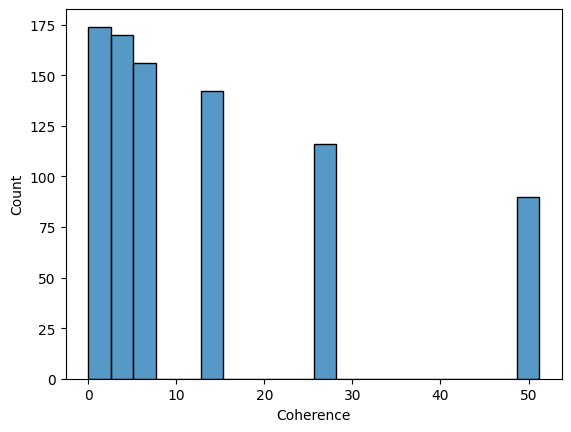

In [18]:
# Histogram

sns.histplot(dots['Coherence'], bins=20)

<Axes: xlabel='Firing_rate', ylabel='Count'>

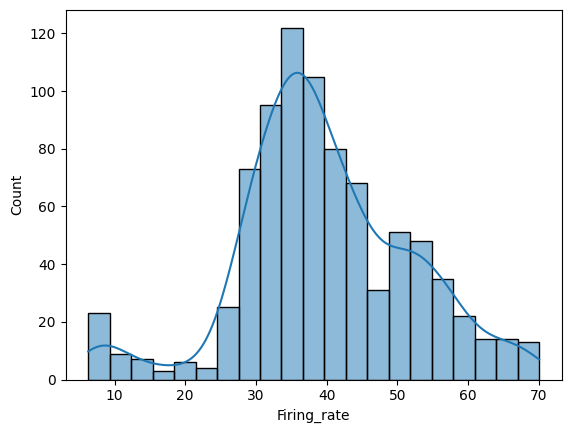

In [19]:
#KDE

sns.histplot(dots['Firing_rate'], kde=True)

# Bivariate Analysis

- Scatter Plot

<Axes: xlabel='Time', ylabel='Coherence'>

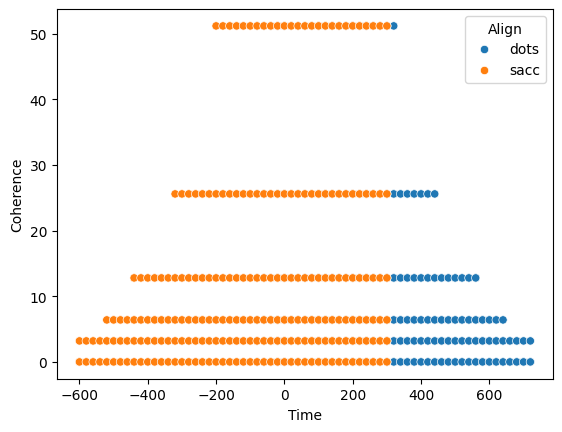

In [20]:
#Scatter Plot
sns.scatterplot(data=dots, x='Time', y='Coherence', hue='Align')

<Axes: xlabel='Time', ylabel='Firing_rate'>

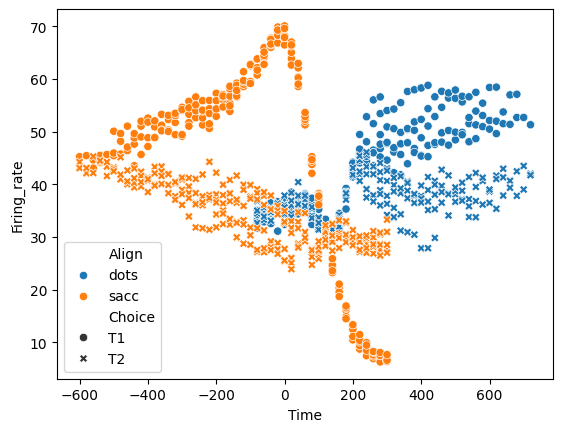

In [21]:
sns.scatterplot(data=dots, x='Time', y='Firing_rate', hue='Align', style='Choice')

#Multivariate Analysis

- Pairplot
- Heatplot

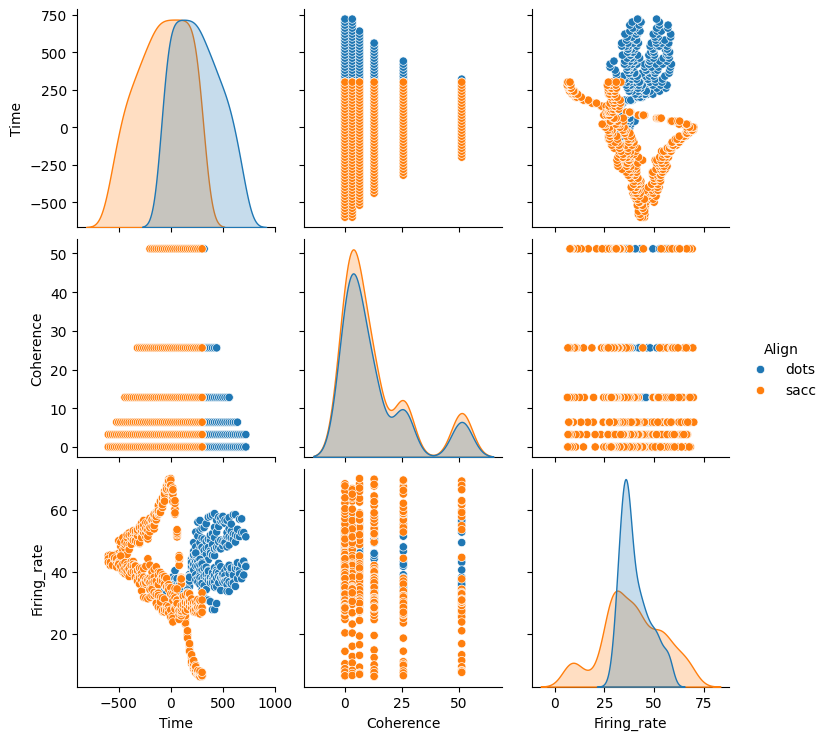

In [22]:
#pairplot

sns.pairplot(dots, hue='Align')